In [5]:
import pandas as pd   #Importing the pandas library to work with the table
datapro = pd.read_csv('climate_change_dataset.csv', header = 0)   #Reading data from CSV, 'header = 0' tells pandas that the first line of the file contains headers.
st = pd.DataFrame(datapro)   #For convenience, I create a DataFrame
pd.set_option('display.max_rows', None)   #'display.max_rows' defines the maximum number of rows displayed when the Data Frame is output
datapro   #Displaying the DataFrame


Year       Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0    2006            UK                   8.9                          9.3   
1    2019           USA                  31.0                          4.8   
2    2014        France                  33.9                          2.8   
3    2010     Argentina                   5.9                          1.8   
4    2007       Germany                  26.9                          5.6   
5    2020         China                  32.3                          1.4   
6    2006     Argentina                  30.7                         11.6   
7    2018  South Africa                  33.9                          6.0   
8    2022            UK                  27.8                         16.6   
9    2010     Australia                  18.3                          1.9   
10   2010     Indonesia                  14.4                          4.9   
11   2023  South Africa                  14.6                         14.7   
12   2020        Brazil                  26.7                         12.2   
13   2003           USA                  27.4                          1.8   
14   2007       Germany                  11.0                         17.6   
15   2023         India                  31.0                         17.6   
16   2002        Russia                  26.4                          6.9   
17   2021        France                  21.9                          7.1   
18   2020         China                  19.1                         19.8   
19   2001        Canada                  21.3                         12.7   
20   2023        France                   9.8                         10.9   
21   2011        Mexico                  11.1                         16.8   
22   2005         India                   7.7                          6.1   
23   2001     Indonesia                   9.6                          8.9   
24   2020        Russia                  18.6                          5.7   
25   2000         India                  20.9                         15.9   
26   2011     Australia                   5.5                         11.7   
27   2021           USA                  28.9                         13.3   
28   2011            UK                  13.8                          5.4   
29   2016         China                  32.4                          4.8   
30   2009         Japan                  34.0                         10.0   
31   2015           USA                  10.6                         14.9   
32   2014         Japan                  18.9                         10.7   
33   2014  South Africa                   5.0                          1.1   
34   2018            UK                  22.9                         17.4   
35   2011        Russia                  23.2                          1.8   
36   2022       Germany                  12.4                         19.1   
37   2019        Canada                  21.8                          1.0   
38   2002        Brazil                  11.8                         14.0   
39   2004     Argentina                   9.8                          2.1   
40   2018            UK                  24.5                         18.3   
41   2006           USA                  14.8                          9.6   
42   2020         China                  22.7                          3.2   
43   2008     Argentina                  18.0                          7.1   
44   2006        Mexico                  34.5                          3.7   
45   2017        Mexico                   9.5                          3.8   
46   2003         India                  18.9                         19.0   
47   2013     Argentina                  25.4                          9.2   
48   2017         China                  16.9                         15.9   
49   2008        Russia                  34.2                         13.0   
50   2020  South Africa    

In [18]:
analyze = ['Avg Temperature (°C)', 'CO2 Emissions (Tons/Capita)', 'Rainfall (mm)']
for column in analyze:   #I create a list, and run through it using the 'for' cycle to perform the necessary calculations
    mean = st[column].mean().round(1)
    median = st[column].median().round(1)
    st_deviat = st[column].std().round(1)
    print(f'Column: {column}')
    print(f'Mean: {mean}')
    print(f'Median: {median}')
    print(f'Standard Deviation: {st_deviat}')
    print('')  #Skip


Column: Avg Temperature (°C)
Mean: 19.9
Median: 20.1
Standard Deviation: 8.5

Column: CO2 Emissions (Tons/Capita)
Mean: 10.4
Median: 10.7
Standard Deviation: 5.6

Column: Rainfall (mm)
Mean: 1738.8
Median: 1726.0
Standard Deviation: 709.0



In [17]:
st.isna().sum()   #The 'isna()' method checks each cell of the DataFrame for gaps, and the 'sum()' method counts the number of gaps


Year                           0
Country                        0
Avg Temperature (°C)           0
CO2 Emissions (Tons/Capita)    0
Sea Level Rise (mm)            0
Rainfall (mm)                  0
Population                     0
Renewable Energy (%)           0
Extreme Weather Events         0
Forest Area (%)                0
dtype: int64

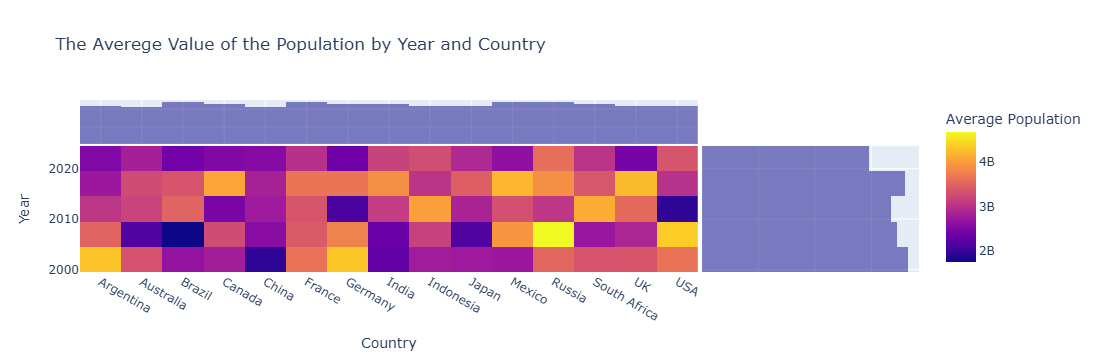

In [10]:
import plotly.express as px
import pandas as pd   #Importing libraries

st = pd.read_csv('climate_change_dataset.csv')   #The data from the CSV file is loaded into a DataFrame object named 'st'

st_avg = st.groupby(['Country', 'Year'], as_index=False)['Population'].mean()   #For each group (country + year), the average Population is calculated. 'as_index = False' the 'Country' and 'Year' columns will remain columns, and will not become indexes

graph = px.density_heatmap(   #Creating a graph
    st_avg,                   #'st_avg' taking a slice of the data
    x = "Country", 
    y = "Year",               #creating the x and y axes and setting the color value (in z), depending on population
    z = "Population", 
    marginal_x = "histogram",      #I add an additional histogram along the x and y axes
    marginal_y = "histogram",
    title = 'The Averege Value of the Population by Year and Country'
)  

graph.update_coloraxes(colorbar_title='Average Population')   #add to change the name of the color scale

graph.show()   #Graph display


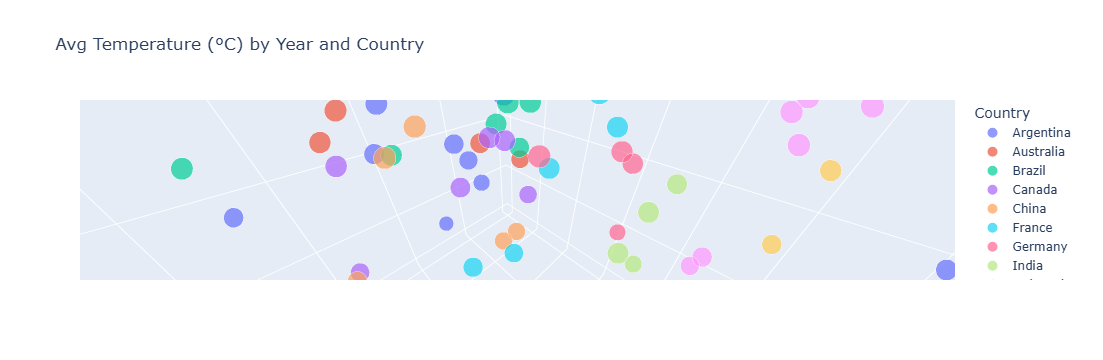

In [21]:
import plotly.express as px
import pandas as pd   ##Importing libraries

st = pd.read_csv('climate_change_dataset.csv')   ##The data from the CSV file is loaded into a DataFrame object named 'st'

st_avg = st.groupby(['Year', 'Country'], as_index=False)['Avg Temperature (°C)'].mean()   #For each group (country + year), the average Temperature is calculated. 'as_index = False' the 'Country' and 'Year' columns will remain columns, and will not become indexes

graph = px.scatter_3d(            #Creating a graph
    st_avg,                       #'st_avg' taking a slice of the data
    x = "Year",                     
    y = "Country",                  
    z = "Avg Temperature (°C)",     #creating the x, y and z axes
    hover_name = "Country",         #name bubbles
    color = "Country",              # Each country has its own color
    size = "Avg Temperature (°C)",  # bubble size depends on temperature
    size_max = 50,                  # Maximum bubble size
    title = 'Avg Temperature (°C) by Year and Country'
)

graph.show()   # #Graph display


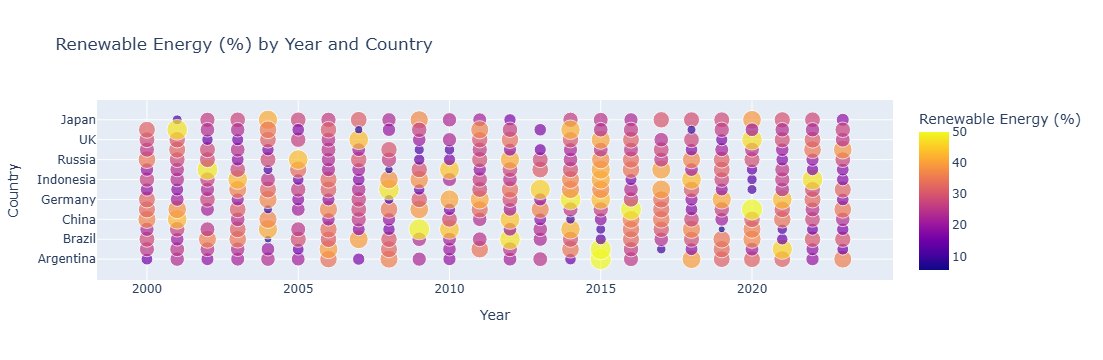

In [23]:
import plotly.express as px
import pandas as pd    #Importing libraries

st = pd.read_csv('climate_change_dataset.csv')   #The data from the CSV file is loaded into a DataFrame object named 'st'

st_avg = st.groupby(['Year', 'Country'], as_index=False)['Renewable Energy (%)'].mean()   #For each group (country + year), the average amount of Renewable Energy is calculated. 'as_index = False' the 'Country' and 'Year' columns will remain columns, and will not become indexes

graph = px.scatter(                   #Creating a graph
    st_avg,                           #'st_avg' taking a slice of the data
    x = "Year", 
    y = "Country",                    #creating the x and y axes
    color = "Renewable Energy (%)",   # The color depends on the percentage of renewable energy
    size = "Renewable Energy (%)",    # point size depends on temperature
    size_max = 15,                    #Maximum point size
    title = "Renewable Energy (%) by Year and Country"
)

graph.show()    #Graph display


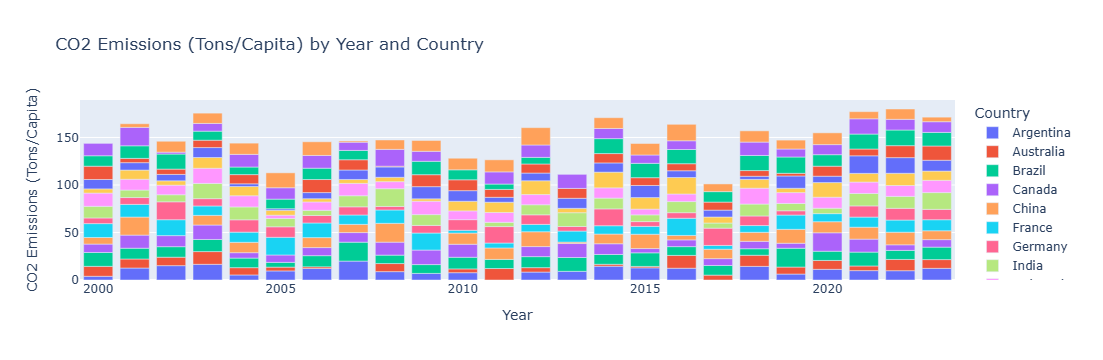

In [22]:
import plotly.express as px
import pandas as pd   #Importing libraries

st = pd.read_csv('climate_change_dataset.csv')   #The data from the CSV file is loaded into a DataFrame object named 'st'

st_avg = st.groupby(['Year', 'Country'], as_index=False)['CO2 Emissions (Tons/Capita)'].mean()   #For each group (country + year), the average amount of CO2 emissions is calculated. 'as_index = False' the 'Country' and 'Year' columns will remain columns, and will not become indexes

graph = px.bar(                          #Creating a graph
    st_avg,                              #'st_avg' taking a slice of the data
    x = 'Year', 
    y = 'CO2 Emissions (Tons/Capita)',   # creating the x and y axes
    color = 'Country',                   # Each country has its own color
    height = 400,                        #setting the height of the graph        
    title = 'CO2 Emissions (Tons/Capita) by Year and Country'         
)

graph.show()   #Graph display


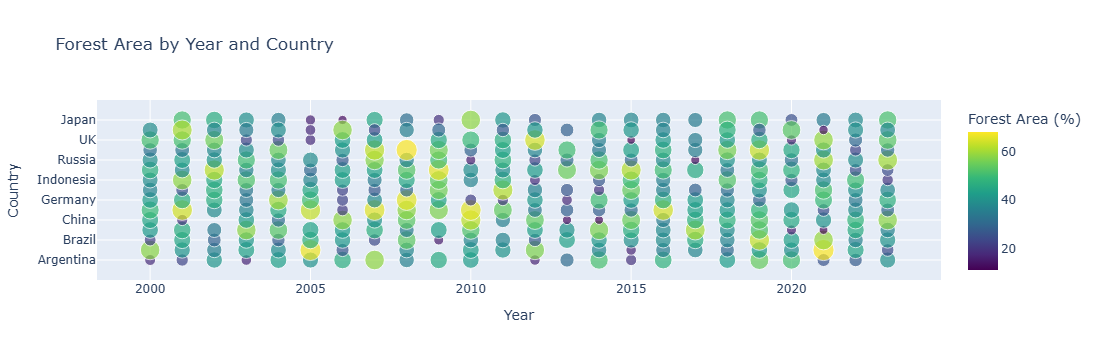

In [25]:
import plotly.express as px
import pandas as pd   #Importing libraries

st = pd.read_csv('climate_change_dataset.csv')   #The data from the CSV file is loaded into a DataFrame object named 'st'

st_avg = st.groupby(['Year', 'Country'], as_index=False)['Forest Area (%)'].mean()   #For each group (country + year), the average amount of Forest Area is calculated. 'as_index = False' the 'Country' and 'Year' columns will remain columns, and will not become indexes

graph = px.scatter(                       #Creating a graph
    st_avg,                               #'st_avg' taking a slice of the data
    x = 'Year', 
    y = 'Country',                        # creating the x and y axes
    color = 'Forest Area (%)',            # color depends on forest area
    color_continuous_scale = 'Viridis',   #I use the "Viridis" color scale
    size = 'Forest Area (%)',             # point size depends on forest area
    size_max = 15,                        #Maximum point size
    title = 'Forest Area by Year and Country'
)

graph.show()   #Graph display


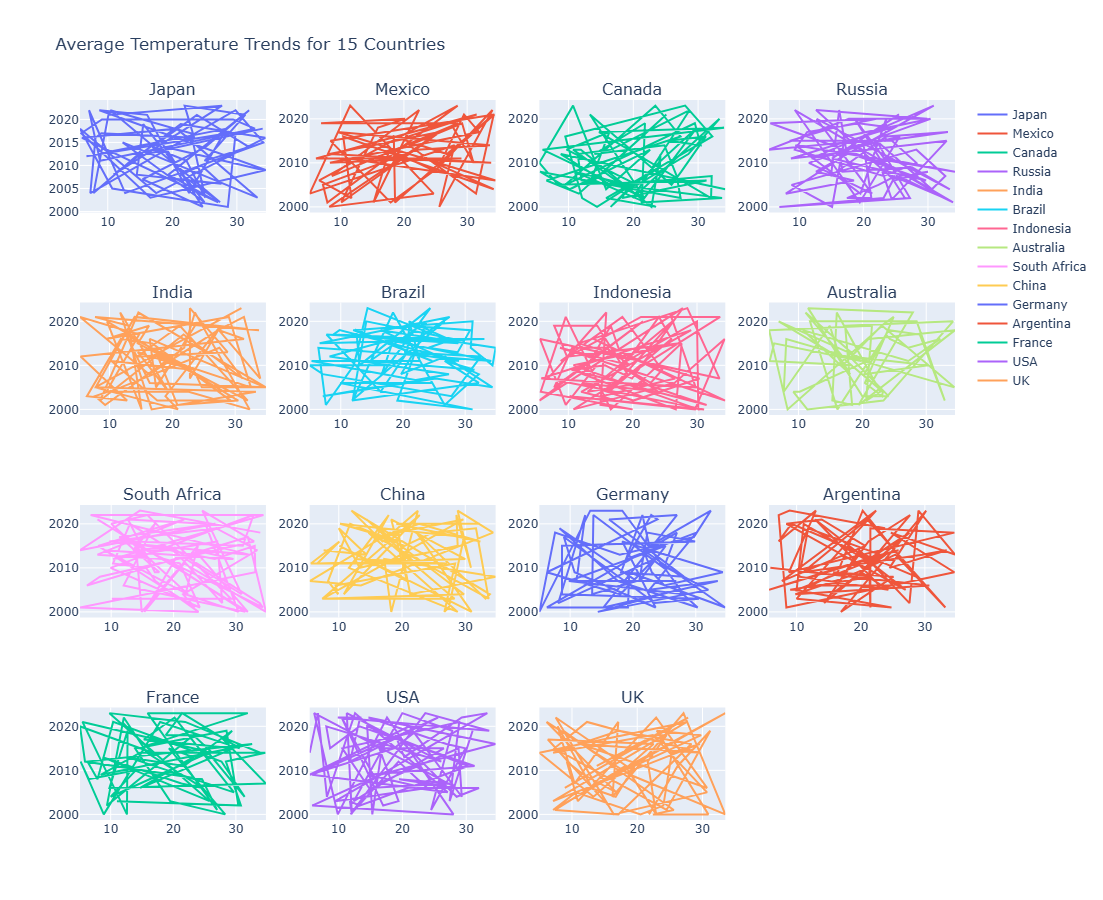

In [27]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go   #Importing libraries

st = pd.read_csv('climate_change_dataset.csv')   #The data from the CSV file is loaded into a DataFrame object named 'st'

countries = [                                    #The list of countries for which I will create the bar charts
    "Japan", "Mexico", "Canada", "Russia", 
    "India", "Brazil", "Indonesia", "Australia", 
    "South Africa", "China", "Germany", "Argentina",
    "France", "USA", "UK"
]

graph = make_subplots(
    rows = 4, cols = 4,
    subplot_titles=countries + [""]   #I create a group of 16 subgraphs (4 by 4), and name each of them, except the last one (because I have only 15 countries)
)

row, col = 1, 1   #determine the position
for country in countries:   #The cycle runs through each country from the list
    country_data = st[st['Country'] == country]   # filters rows in the DataFrame where the value in the Country column matches the current country

#NO GROUPBY?!
    
    graph.add_trace(                                    #Creating a graph in a cycle
        go.Scatter(
            x = country_data['Avg Temperature (°C)'],   #creating the x and y axes
            y = country_data['Year'],
            mode = 'lines',                             #The lines connect the dots
            name = country
        ),
        row = row, col = col                            # Add our created graph in the following position
    )

#NO TREND LINE?! HOW CAN YOU USE THIS CHART?
    
    col += 1
    if col > 4:  
        col = 1
        row += 1   #Move to the next position

graph.update_layout(                                              #Set the graph 
    height = 900,   
    width = 1200,  
    title_text = "Average Temperature Trends for 15 Countries",   
    showlegend = True                                            #show the legend to make it easier to use the graph
)

graph.show()   #Graph display


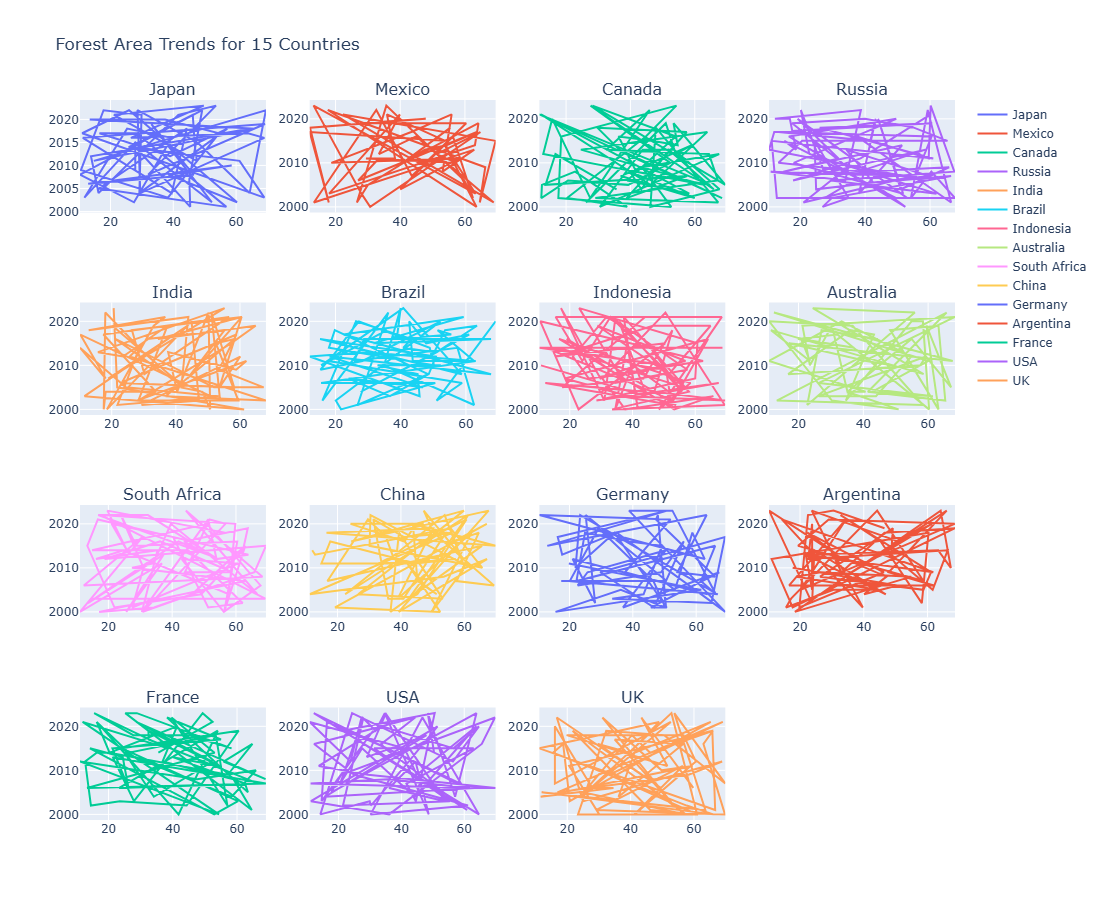

In [14]:
#AGAIN(((
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go   #Importing libraries

st = pd.read_csv('climate_change_dataset.csv')   #The data from the CSV file is loaded into a DataFrame object named 'st'

countries = [                                    #The list of countries for which I will create the bar charts
    "Japan", "Mexico", "Canada", "Russia", 
    "India", "Brazil", "Indonesia", "Australia", 
    "South Africa", "China", "Germany", "Argentina",
    "France", "USA", "UK"
]

graph = make_subplots(
    rows = 4, cols = 4,
    subplot_titles=countries + [""]   #I create a group of 16 subgraphs (4 by 4), and name each of them, except the last one (because I have only 15 countries)
)

row, col = 1, 1   #determine the position
for country in countries:   #The cycle runs through each country from the list
    country_data = st[st['Country'] == country]   # filters rows in the DataFrame where the value in the Country column matches the current country

#NO GROUPBY?!
    
    graph.add_trace(                                    #Creating a graph in a cycle
        go.Scatter(
            x = country_data['Forest Area (%)'],        #creating the x and y axes
            y = country_data['Year'],
            mode = 'lines',                             #The lines connect the dots
            name = country
        ),
        row = row, col = col                            # Add our created graph in the following position
    )

#NO TREND LINE?! HOW CAN YOU USE THIS CHART?
    
    col += 1
    if col > 4:  
        col = 1
        row += 1   #Move to the next position

graph.update_layout(                                              #Set the graph 
    height = 900,   
    width = 1200,  
    title_text = "Forest Area Trends for 15 Countries",   
    showlegend = True                                            #show the legend to make it easier to use the graph
)

graph.show()   #Graph display


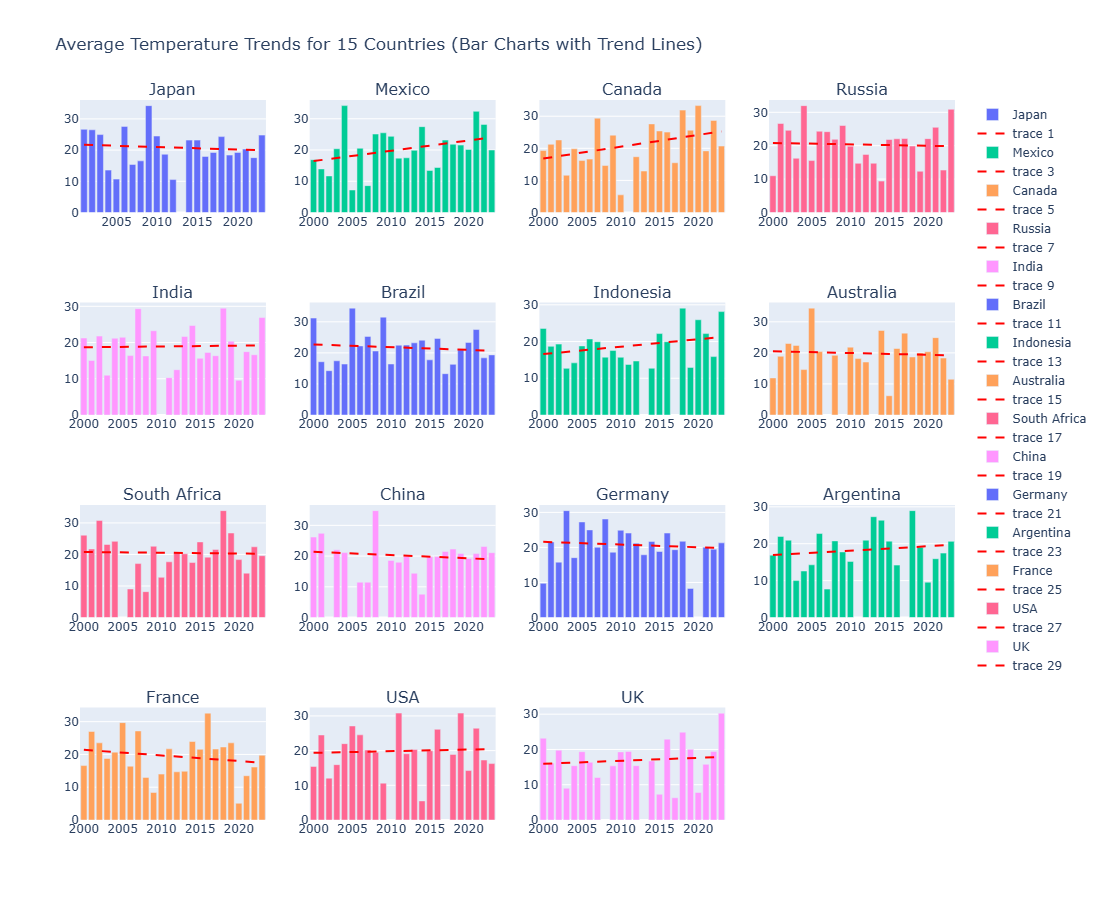

In [24]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np   #Importing libraries

st = pd.read_csv('climate_change_dataset.csv')   #The data from the CSV file is loaded into a DataFrame object named 'st'

countries = [                                    #The list of countries for which I will create the bar charts
    "Japan", "Mexico", "Canada", "Russia", 
    "India", "Brazil", "Indonesia", "Australia", 
    "South Africa", "China", "Germany", "Argentina",
    "France", "USA", "UK"
]

st_avg = st.groupby(['Country', 'Year'], as_index=False)['Avg Temperature (°C)'].mean()   #For each group (country + year), the average Temperature is calculated. 'as_index = False' the 'Country' and 'Year' columns will remain columns, and will not become indexes

graph = make_subplots(
    rows = 4, cols = 4,
    subplot_titles = countries + [""]   #I create a group of 16 subgraphs (4 by 4), and name each of them, except the last one (because I have only 15 countries)
)

row, col = 1, 1   #determine the position
for country in countries:   #The cycle runs through each country from the list
    country_data = st_avg[st_avg['Country'] == country]   # filters rows in the DataFrame where the value in the Country column matches the current country
    
    graph.add_trace(                                  #Creating a graph in a cycle              
        go.Bar(
            x = country_data['Year'], 
            y = country_data['Avg Temperature (°C)'],   #creating the x and y axes
            name = country
        ),
        row = row, col = col                              # Add our created graph in the following position
    )
    
    if len(country_data) > 1:                         # to create a trend line, I need data for at least 2 years
        x = country_data['Year']
        y = country_data['Avg Temperature (°C)']
        z = np.polyfit(x, y, 1)                      #I use 'np.polyfit()' to calculate the linear relationship between x (Year) and y (Temperature). '1' -- we need a line
        trend = np.poly1d(z)                         #the 'np.poly1d(z)' function creates an object representing a polynomial equation

        graph.add_trace(                             # creating a trend line
            go.Scatter(
                x = x,
                y = trend(x),                        #axe x -- Year; axe y -- trend line
                mode = 'lines',
                line = dict(color='red', dash='dash'),   #set the line
                showlegend = True   #show the trend line legend for convenience
            ),
            row = row, col = col                     #Add our created trend line in the following position in each graph
        )
    
    col += 1
    if col > 4:  
        col = 1
        row += 1    #Move to the next position

graph.update_layout(                                #Set the graph 
    height = 900,  # 
    width = 1200,  #
    title_text = "Average Temperature Trends for 15 Countries (Bar Charts with Trend Lines)",
    showlegend = True                               #show the legend to make it easier to use the graph
)

graph.show()   #Graph display


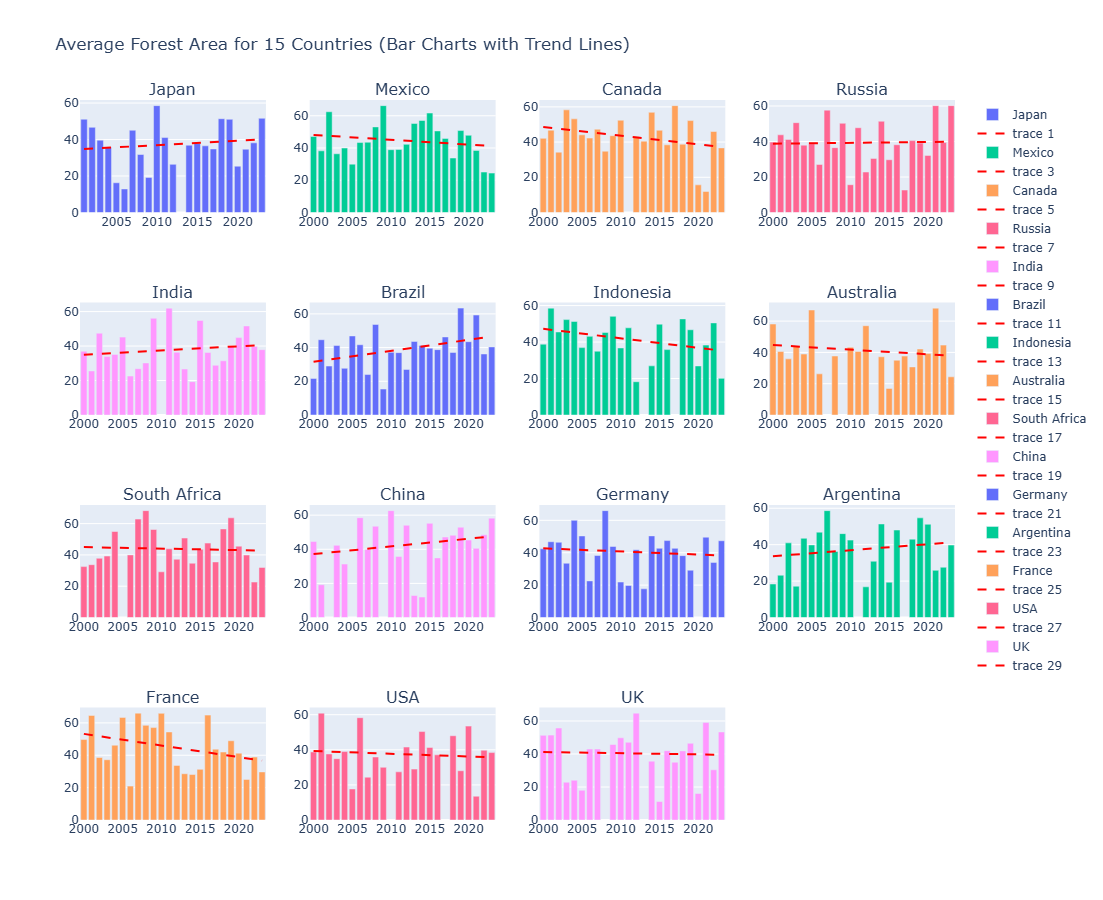

In [23]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np   #Importing libraries

st = pd.read_csv('climate_change_dataset.csv')   #The data from the CSV file is loaded into a DataFrame object named 'st'

countries = [                                    #The list of countries for which I will create the bar charts
    "Japan", "Mexico", "Canada", "Russia", 
    "India", "Brazil", "Indonesia", "Australia", 
    "South Africa", "China", "Germany", "Argentina",
    "France", "USA", "UK"
]

st_avg = st.groupby(['Country', 'Year'], as_index=False)['Forest Area (%)'].mean()   #For each group (country + year), the average Forest Area is calculated. 'as_index = False' the 'Country' and 'Year' columns will remain columns, and will not become indexes

graph = make_subplots(
    rows = 4, cols = 4,
    subplot_titles = countries + [""]   #I create a group of 16 subgraphs (4 by 4), and name each of them, except the last one (because I have only 15 countries)
)

row, col = 1, 1   #determine the position
for country in countries:   #The cycle runs through each country from the list
    country_data = st_avg[st_avg['Country'] == country]   # filters rows in the DataFrame where the value in the Country column matches the current country
    
    graph.add_trace(                                  #Creating a graph in a cycle              
        go.Bar(
            x = country_data['Year'], 
            y = country_data['Forest Area (%)'],      #creating the x and y axes
            name = country
        ),
        row = row, col = col                          # Add our created graph in the following position
    )
    
    if len(country_data) > 1:                         # to create a trend line, I need data for at least 2 years
        x = country_data['Year']
        y = country_data['Forest Area (%)']
        z = np.polyfit(x, y, 1)                      #I use 'np.polyfit()' to calculate the linear relationship between x (Year) and y (Forest Area). '1' -- we need a line
        trend = np.poly1d(z)                         #the 'np.poly1d(z)' function creates an object representing a polynomial equation

        graph.add_trace(                             # creating a trend line
            go.Scatter(
                x = x,
                y = trend(x),                        #axe x -- Year; axe y -- trend line
                mode = 'lines',
                line = dict(color='red', dash='dash'),   #set the line
                showlegend = True   #show the trend line legend for convenience
            ),
            row = row, col = col                     #Add our created trend line in the following position in each graph
        )
    
    col += 1
    if col > 4:  
        col = 1
        row += 1    #Move to the next position

graph.update_layout(                                #Set the graph 
    height = 900,  # 
    width = 1200,  #
    title_text = "Average Forest Area for 15 Countries (Bar Charts with Trend Lines)",
    showlegend = True                               #show the legend to make it easier to use the graph
)

graph.show()   #Graph display


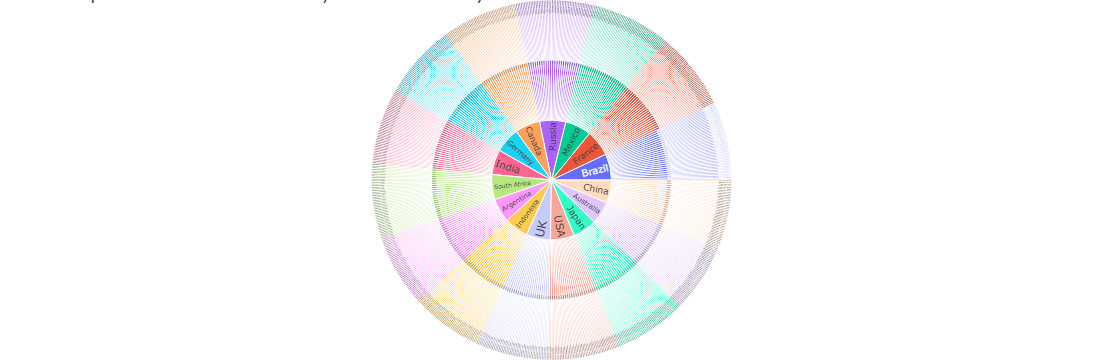

In [16]:
import pandas as pd
import plotly.graph_objects as go    #Importing libraries

st = pd.read_csv('climate_change_dataset.csv')   #The data from the CSV file is loaded into a DataFrame object named 'st'

st_avg = st.groupby(['Year', 'Country'], as_index=False).agg({   #'groupby()' -- groups data by Year and Country columns; 'agg()' -- allows us to apply different functions to different columns at the same time.
    'Avg Temperature (°C)': 'mean',
    'Forest Area (%)': 'mean'
})

ids = []
labels = []
parents = []   #I create 3 lists: 1) ID for elements; 2) text in graph; 3) connection with previous levels (Country -> Year -> Temperature and Forest Area)

for i, row in st_avg.iterrows():   #method '.iterrows()' allows you to go through each row (Year + Country) in the DataFrame; k -- row index (actually, I don't need it in this case)
    country = str(row['Country'])   # 'row['Country']' stores the country name for the current data row, I put it in 'str' format for next steps
    year = row['Year']   # 'row['Year']' stores the year for the current data row
    temperature_labels = f"Temperature: {round(row['Avg Temperature (°C)'], 2)}°C"   #averege temperature for Year and Country
    forest_labels = f"Forest Area: {round(row['Forest Area (%)'], 2)}%"   #averege forest area for Year and Country
    
    if country not in ids:   # 1st level (Country)
        ids.append(country)
        labels.append(country)
        parents.append("")   # Year has no previous levels (it is the first one)

    year_ids = f"{country} - {year}"   # 2nd level (Year)
    ids.append(year_ids)
    labels.append(year)
    parents.append(country)   #connection
    
    temperature_ids = f"{year_ids} - Temperature"   # 3d level (Temperature)
    ids.append(temperature_ids)
    labels.append(temperature_labels)
    parents.append(year_ids)    #connection
    
    forest_ids = f"{year_ids} - Forest"   # 3d level (Forest Area)
    ids.append(forest_ids)
    labels.append(forest_labels)
    parents.append(year_ids)    #connection

graph = go.Figure(go.Sunburst(   #Creating a Sunburst chart
    ids = ids,
    labels = labels,
    parents = parents   #I define the elements of the graph, add text, and sequentially link the elements of the graph
))

graph.update_layout(   #set the graph
    margin=dict(       # I create a dictionary in which indentation values are set for all four sides of the graph
        t=0,           # indentation at the top
        l=0,           # indentation on the left
        r=0,           # indentation on the right
        b=0            # indentation from below
    ),
    title="Temperature and Forest Area by Year and Country"
)

graph.show()   #Graph display


In [7]:
import pandas as pd   #importing pandas

st = pd.read_csv('climate_change_dataset.csv')   #The data from the CSV file is loaded into a DataFrame object named 'st'

k = 100   #Temperature coefficient of influence

st['Sea Level Change (mm)'] = (        #Adding a new column with the final water level
    st['Sea Level Rise (mm)'] +
    st['Rainfall (mm)'] -
    (st['Avg Temperature (°C)'] * k)   #Calculating a new column Sea Level Change (mm), using the special formula
)

st.to_csv('climate_change_dataset_new.csv', index = False)   #saving the updated DataFrame to the climate_change_dataset_new.csv file, without including the row index in the CSV file ('index = False')

print("Here is your new dataset")   #Let's check that everything works great!


Here is your new dataset


In [12]:
import pandas as pd   #Importing the pandas library to work with the table
datapro = pd.read_csv('climate_change_dataset_new.csv', header = 0)   #Reading data from CSV (our updated dataset), 'header = 0' tells pandas that the first line of the file contains headers.
st = pd.DataFrame(datapro)   #For convenience, I create a DataFrame
pd.set_option('display.max_rows', None)   #'display.max_rows' defines the maximum number of rows displayed when the Data Frame is output
datapro   #Displaying the DataFrame

Year       Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0    2006            UK                   8.9                          9.3   
1    2019           USA                  31.0                          4.8   
2    2014        France                  33.9                          2.8   
3    2010     Argentina                   5.9                          1.8   
4    2007       Germany                  26.9                          5.6   
5    2020         China                  32.3                          1.4   
6    2006     Argentina                  30.7                         11.6   
7    2018  South Africa                  33.9                          6.0   
8    2022            UK                  27.8                         16.6   
9    2010     Australia                  18.3                          1.9   
10   2010     Indonesia                  14.4                          4.9   
11   2023  South Africa                  14.6                         14.7   
12   2020        Brazil                  26.7                         12.2   
13   2003           USA                  27.4                          1.8   
14   2007       Germany                  11.0                         17.6   
15   2023         India                  31.0                         17.6   
16   2002        Russia                  26.4                          6.9   
17   2021        France                  21.9                          7.1   
18   2020         China                  19.1                         19.8   
19   2001        Canada                  21.3                         12.7   
20   2023        France                   9.8                         10.9   
21   2011        Mexico                  11.1                         16.8   
22   2005         India                   7.7                          6.1   
23   2001     Indonesia                   9.6                          8.9   
24   2020        Russia                  18.6                          5.7   
25   2000         India                  20.9                         15.9   
26   2011     Australia                   5.5                         11.7   
27   2021           USA                  28.9                         13.3   
28   2011            UK                  13.8                          5.4   
29   2016         China                  32.4                          4.8   
30   2009         Japan                  34.0                         10.0   
31   2015           USA                  10.6                         14.9   
32   2014         Japan                  18.9                         10.7   
33   2014  South Africa                   5.0                          1.1   
34   2018            UK                  22.9                         17.4   
35   2011        Russia                  23.2                          1.8   
36   2022       Germany                  12.4                         19.1   
37   2019        Canada                  21.8                          1.0   
38   2002        Brazil                  11.8                         14.0   
39   2004     Argentina                   9.8                          2.1   
40   2018            UK                  24.5                         18.3   
41   2006           USA                  14.8                          9.6   
42   2020         China                  22.7                          3.2   
43   2008     Argentina                  18.0                          7.1   
44   2006        Mexico                  34.5                          3.7   
45   2017        Mexico                   9.5                          3.8   
46   2003         India                  18.9                         19.0   
47   2013     Argentina                  25.4                          9.2   
48   2017         China                  16.9                         15.9   
49   2008        Russia                  34.2                         13.0   
50   2020  South Africa    

In [9]:
import pandas as pd  # Importing pandas

st = pd.read_csv('climate_change_dataset_new.csv')  #The data from the CSV file is loaded into a DataFrame object named 'st'

st['Forest Area per Population (%)'] = (
    st['Forest Area (%)'] / st['Population'] * 100    # here we calculate the ratio of forest area to population
)

st.to_csv('climate_change_dataset_new2.csv', index = False)   #saving the updated DataFrame to the climate_change_dataset_new.csv file, without including the row index in the CSV file ('index = False')

print("Here is your new dataset")    #Let's check that everything works great!


Here is your new dataset


In [11]:
import pandas as pd   #Importing the pandas library to work with the table
datapro = pd.read_csv('climate_change_dataset_new2.csv', header = 0)   #Reading data from CSV (our updated dataset), 'header = 0' tells pandas that the first line of the file contains headers.
st = pd.DataFrame(datapro)   #For convenience, I create a DataFrame
pd.set_option('display.max_rows', None)   #'display.max_rows' defines the maximum number of rows displayed when the Data Frame is output
datapro   #Displaying the DataFrame

Year       Country  Avg Temperature (°C)  CO2 Emissions (Tons/Capita)  \
0    2006            UK                   8.9                          9.3   
1    2019           USA                  31.0                          4.8   
2    2014        France                  33.9                          2.8   
3    2010     Argentina                   5.9                          1.8   
4    2007       Germany                  26.9                          5.6   
5    2020         China                  32.3                          1.4   
6    2006     Argentina                  30.7                         11.6   
7    2018  South Africa                  33.9                          6.0   
8    2022            UK                  27.8                         16.6   
9    2010     Australia                  18.3                          1.9   
10   2010     Indonesia                  14.4                          4.9   
11   2023  South Africa                  14.6                         14.7   
12   2020        Brazil                  26.7                         12.2   
13   2003           USA                  27.4                          1.8   
14   2007       Germany                  11.0                         17.6   
15   2023         India                  31.0                         17.6   
16   2002        Russia                  26.4                          6.9   
17   2021        France                  21.9                          7.1   
18   2020         China                  19.1                         19.8   
19   2001        Canada                  21.3                         12.7   
20   2023        France                   9.8                         10.9   
21   2011        Mexico                  11.1                         16.8   
22   2005         India                   7.7                          6.1   
23   2001     Indonesia                   9.6                          8.9   
24   2020        Russia                  18.6                          5.7   
25   2000         India                  20.9                         15.9   
26   2011     Australia                   5.5                         11.7   
27   2021           USA                  28.9                         13.3   
28   2011            UK                  13.8                          5.4   
29   2016         China                  32.4                          4.8   
30   2009         Japan                  34.0                         10.0   
31   2015           USA                  10.6                         14.9   
32   2014         Japan                  18.9                         10.7   
33   2014  South Africa                   5.0                          1.1   
34   2018            UK                  22.9                         17.4   
35   2011        Russia                  23.2                          1.8   
36   2022       Germany                  12.4                         19.1   
37   2019        Canada                  21.8                          1.0   
38   2002        Brazil                  11.8                         14.0   
39   2004     Argentina                   9.8                          2.1   
40   2018            UK                  24.5                         18.3   
41   2006           USA                  14.8                          9.6   
42   2020         China                  22.7                          3.2   
43   2008     Argentina                  18.0                          7.1   
44   2006        Mexico                  34.5                          3.7   
45   2017        Mexico                   9.5                          3.8   
46   2003         India                  18.9                         19.0   
47   2013     Argentina                  25.4                          9.2   
48   2017         China                  16.9                         15.9   
49   2008        Russia                  34.2                         13.0   
50   2020  South Africa    

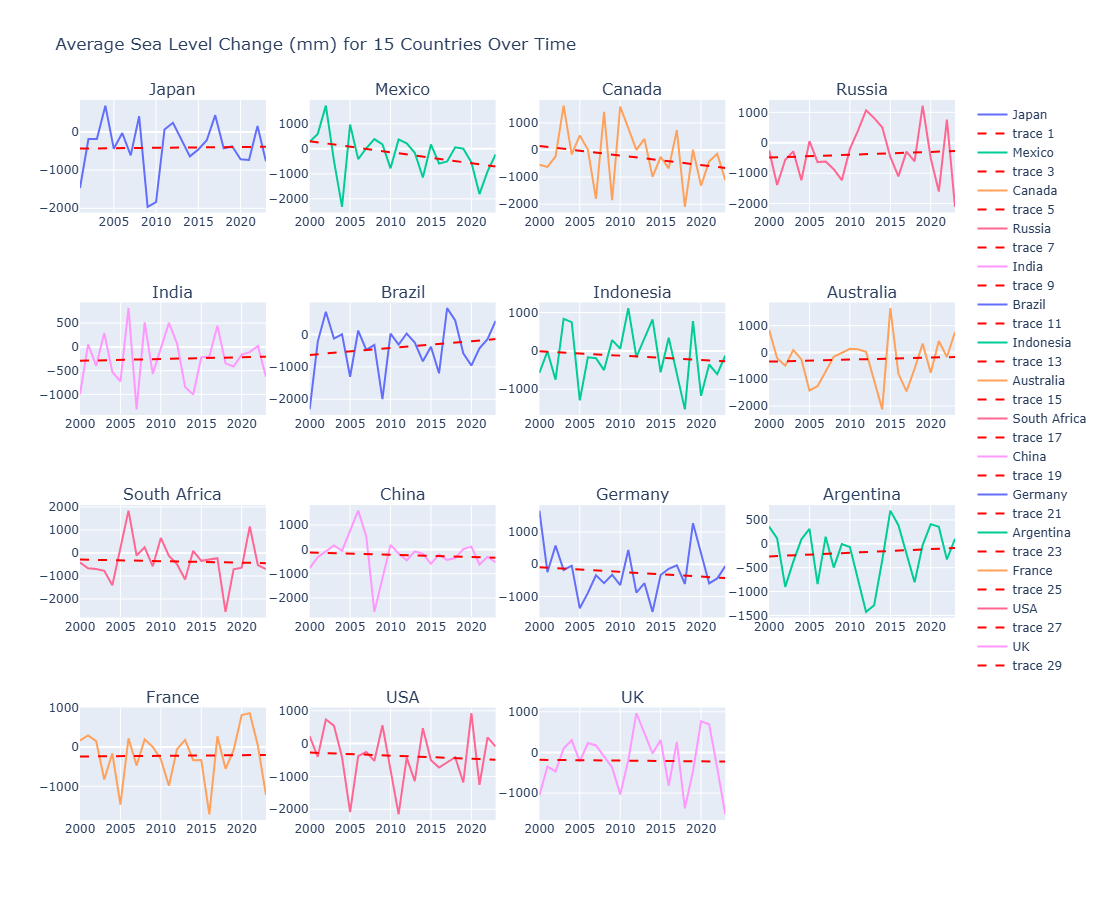

In [21]:
import pandas as pd
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go   #Importing libraries

st = pd.read_csv('climate_change_dataset_new.csv')   #The data from the CSV file is loaded into a DataFrame object named 'st'

countries = [                                        #The list of countries for which I will create the line charts
    "Japan", "Mexico", "Canada", "Russia", 
    "India", "Brazil", "Indonesia", "Australia", 
    "South Africa", "China", "Germany", "Argentina",
    "France", "USA", "UK"
]

st_avg = st.groupby(['Country', 'Year'], as_index=False)['Sea Level Change (mm)'].mean()   #For each group (country + year), the average Sea Level Change value is calculated. 'as_index = False' the 'Country' and 'Year' columns will remain columns, and will not become indexes

graph = make_subplots(
    rows = 4, cols = 4,
    subplot_titles = countries + [""]   #I create a group of 16 subgraphs (4 by 4), and name each of them, except the last one (because I have only 15 countries)
)

row, col = 1, 1   #determine the position
for country in countries:   #The cycle runs through each country from the list
    country_data = st_avg[st_avg['Country'] == country]   # filters rows in the DataFrame where the value in the Country column matches the current country
    
    graph.add_trace(                                      #Creating a graph in a cycle   
        go.Scatter(
            x = country_data['Year'],  
            y = country_data['Sea Level Change (mm)'],    #creating the x and y axes
            name = country
        ),
        row = row, col = col                              # Add our created graph in the following position
    )
    
    if len(country_data) > 1:                             # to create a trend line, I need data for at least 2 years
        x = country_data['Year']
        y = country_data['Sea Level Change (mm)']
    
        z = np.polyfit(x, y, 1)                           # I use 'np.polyfit()' to calculate the linear relationship between x (Year) and y (Sea Level Change). '1' -- we need a line
        trend = np.poly1d(z)                              # the 'np.poly1d(z)' function creates an object representing a polynomial equation
        
        graph.add_trace(                                  # creating a trend line
            go.Scatter(
                x = x, 
                y = trend(x),                             #axe x -- Year; axe y -- trend line
                mode = 'lines',
                line = dict(color='red', dash='dash'),    #set the line
                showlegend = True                         #show the trend line legend for convenience
            ),
            row = row, col = col                          #Add our created trend line in the following position in each graph
        )
    
    col += 1
    if col > 4:  
        col = 1
        row += 1    #Move to the next position

graph.update_layout(   #Set the graph
    height = 900,  
    width = 1200,  
    title_text = "Average Sea Level Change (mm) for 15 Countries Over Time",
    showlegend = True   #show the legend to make it easier to use the graph
)

graph.show()   #Graph display
